# Scikit-Learn and Surprise

## Scikit-Learn 

In [14]:
from sklearn.datasets import load_digits # 숫자 데이터셋
import numpy as np 
digits = load_digits() # 숫자 데이터 셋 로드해온다.
digits.keys() # 해당 데이터셋의 Key

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [15]:
digits.data # 해당 데이터셋의 데이터

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [16]:
digits.target # 해당 데이터셋의 target

array([0, 1, 2, ..., 8, 9, 8])

In [17]:
print(digits.DESCR) # 손글씨 인식하는 데이터

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

이미지 ,음악, 영상같은 데이터의 경우 pandas로 바꿀 필요가 없다. -> 의미가 없다

In [18]:
digits.data.shape # 데이터의 shape 

(1797, 64)

In [19]:
digits.target.shape # target의 shape

(1797,)

In [20]:
digits.data.dtype # data type -> 숫자가 아닐 경우 숫자화 해주어야한다.

dtype('float64')

In [21]:
np.bincount(digits.target) 
# value_count()와 비슷한 기능을 함. 개수 정보 얻어옴.

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

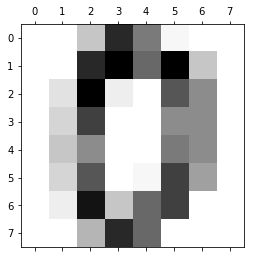

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline 
# inline을 통해서 notebook상에서 plot을 볼 수 있게 해준다.
x = digits.data[0].reshape(8,8) # 64차원의 벡터를 8 x 8의 matrix로 reshape해줌.
plt.matshow(x, cmap=plt.cm.Greys) # array를 matrix로 바꿔 이미지로서 보여줌.

pandas에서 했던 것을 numpy에서 시행 해본 것

In [13]:
digits.target[0] # 0번째 데이터에 대한 target값

0

__Matplotlib의 구성__  
matplotlib로 그래프를 그릴 때 Figure 객체와 하나 이상의 subplot(Axes) 객체가 필요하다.  
그리고 다시 Axes 객체는 2개의 Axis객체를 포함한다.  
여기서 Axis 객체가 x축, y축을 나타낸다.  
  
[matplotlib 구성에 대한 포스트 링크](https://wikidocs.net/4763)

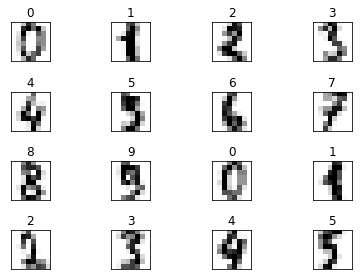

In [32]:
fig, axes = plt.subplots(4,4) # grid를 4x4로 나뉨
# subplot(=Axes)들과 subplot들을 감싸줄 figure을 만들어낸다.

for x,y, ax in zip(digits.data, digits.target, axes.ravel()):  #ravel() -> flatten
# digits 데이터셋의 데이터, 타겟, 그리고 행렬로 되어진 subplot에 대한 반복문
    ax.set_title(y) # subplot에 title을 붙여준다. 
    ax.imshow(x.reshape(8,8), cmap="Greys") # 8X8 이미지를 'Greys'색으로 보여준다.
    ax.set_xticks(()) # x 눈금 설정
    ax.set_yticks(()) # y 눈금 설정
plt.tight_layout() 
# subplot들간의 공간을 적용하기 위해 subplot 파라미터들의 dict타입 객체를 반환

In [33]:
a = [1,2,3]
b = ['a','b','c']
c = zip(a,b)
list(c) 
# zip의 경우 이렇게 묶어주는 것이다.

[(1, 'a'), (2, 'b'), (3, 'c')]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
# 우선 training set, test set을 분리한다.
# Default가 66%이기 때문에 train : test = 2 : 1 비율로 분리해준다.
# overfitting 방지위해서 training, test set을 나눈다.

In [35]:
digits.data.shape

(1797, 64)

In [36]:
X_train.shape

(1347, 64)

In [37]:
X_test.shape

(450, 64)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier()

In [40]:
knn.fit(X_train, y_train) # training(=fitting) 시킨다.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
X_test[0] #  테스트 셋의 데이터 첫번째 row

array([  0.,   1.,   9.,  16.,  16.,  15.,   3.,   0.,   0.,   8.,  16.,
        12.,   8.,   8.,   3.,   0.,   0.,   6.,  16.,   9.,   3.,   0.,
         0.,   0.,   0.,   8.,  16.,  16.,  16.,   4.,   0.,   0.,   0.,
         3.,   6.,   4.,  13.,  11.,   0.,   0.,   0.,   0.,   0.,   0.,
         8.,  13.,   0.,   0.,   0.,   0.,   5.,   8.,  15.,  10.,   0.,
         0.,   0.,   0.,  11.,  16.,  11.,   1.,   0.,   0.])

In [35]:
knn.predict([X_test[0]]) # 해당 데이터에 대한 예측값 반환

array([2])

In [42]:
knn.score(X_test, y_test) 
# test set에 대해서 data에 대한 예측값과 target값을 비교하여 accuracy 반환

0.99111111111111116

---

## Unsupervised Learning

In [43]:
from sklearn.model_selection import train_test_split
import numpy as np
np.set_printoptions(suppress=True)
# suppress=True 플래그 설정을 통해서 부동소수점 실수를 고정소수점 실수로 출력

digits = load_digits() # 숫자 데이터를 불러온다.
X, y = digits.data, digits.target # 각각 숫자 데이터, 그에대한 타겟값을 할당
X_train,X_test,y_train,y_test = train_test_split(X, y) # train set, test set

In [44]:
from sklearn.preprocessing import StandardScaler 
# unit variance(단위 분산)에 맞게 scale(범위)를 맞춰주고 평균을 제거해서
# feature들을 표준화

In [45]:
scaler = StandardScaler() # 숫자를 어떠한 방식으로 변환시켜줄 것인가 도와줌
# 똑같이 scikit에서 import해서 객체화한 다음 fit_transform()시켜서 쓰면 된다.

__표준화는 평균을 0, 표준편차를 1으로 만드는 것이다.__  
이렇게 되면 데이터의 영향력이 줄어들도록 하는 것이다.

In [46]:
scaler.fit(X_train) # training set에 대하여 평균과 표준편차를 계산한다.

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
X_train_scaled = scaler.transform(X_train)
# 범위를 맞추고, 중점을 잡아서 표준화를 실행한다.

In [48]:
scaler.fit_transform(X_train) # 위의 fit과 transform을 한꺼번에 해준다.

array([[ 0.        , -0.33235445, -0.44833607, ..., -1.13622626,
        -0.50355172, -0.19314451],
       [ 0.        , -0.33235445, -0.65831822, ...,  1.57082087,
         1.95133127, -0.19314451],
       [ 0.        , -0.33235445,  1.02153903, ..., -0.62865492,
        -0.50355172, -0.19314451],
       ..., 
       [ 0.        ,  1.9575762 ,  1.23152118, ...,  1.06324954,
         3.42426106,  0.35572818],
       [ 0.        , -0.33235445, -1.07828253, ...,  1.40163043,
        -0.01257512, -0.19314451],
       [ 0.        , -0.33235445, -0.44833607, ..., -1.13622626,
        -0.50355172, -0.19314451]])

fit, transform의 경우 일관된 형식으로 쓸 수 있고, fit_transform의 경우 한번에 fit과 transform을 해준다.

In [49]:
scaler.fit_transform(X_train).mean() # 표준화 이후 거의 평균이 0이 나옴.

6.0992207737387962e-18

데이터 불러오기
 - pandas
  - info
  - describe
  - head, tail, sample
  - groupby, plot
 - numpy
  - matplotlib
 - ML(Machine Learning) 용 데이터 변환 -> 데이터를 Numeric하게 바꿔야함.
  - label encoding -> ordinal data
  - One-hot encoding -> categorical data.  다만 category가 많을 경우 벡터의 차원수가 늘어나면서 performance 저하
 - 데이터 변환 ( 성능 향상 위해 Normalization )
  - scaler 사용

데이터 전처리
 - Missing
 - Duplicated

데이터 수에 따라
- 데이터가 많을 때 (경험에 의해서 판별)
 - train_test_split ( overfitting을 막기위해서 )
 - 알고리즘 적용
  - from sklearn.알고리즘분류 import XClassfier (분류기의 경우 이렇게 불러온다.)
   - instantiate
   - fit
   - score , pca
   ( pca : 데이터의 분산(variance)를 최대한 보존하면서 서로 직교하는 새 축을 찾아서, 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법)
   - 이렇게 해서 score가 높지 않을 경우 전처리부분으로 돌아간다.
 
- 데이터가 적을 때
 - cross-validation -> 보통 10 folds로 쓴다.
  - 기본적인 cross-validation
  - stratified -> dummy Classifier에도 나왔던 용어. 클래스(라벨) 개수를 고려해서 나눠주는 것이다. 클래스의 분포를 비슷하게 샘플링 해준다.
  - shuffle -> 데이터 양이 너무 적어서 sampling할 때 중복을 허용한다.
  - group -> 항상 grouping 되어야 하는 데이터일 경우에 사용.
 - cross-validation은 최종 모델이 아니다!!!!! -> 데이터 모델로 성능 예측용
 
- GridSearchCV -> hyper parameter를 찾는데 사용 (데이터 적을 때나 많을 때나 사용)
 
  

In [51]:
from sklearn.datasets import load_iris
data = load_iris() #iris 데이터 로딩
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)
# training set, test set을 나눠줌.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # KNN 분류기
knn.fit(X_train, y_train) # 분류기 fitting
knn.score(X_test, y_test) # 분류기의 average

1.0

In [52]:
from sklearn.preprocessing import StandardScaler 
# 표준 스케일. 평균과 표준편차를 이용한다.

In [53]:
standard = StandardScaler()

In [54]:
X_train_scaler = standard.fit_transform(X_train) # training set 표준화 해준다.

In [55]:
X_test_scaler = standard.fit_transform(X_test) # test set 표준화 해준다.

In [56]:
knn2 = KNeighborsClassifier()

In [57]:
knn2.fit(X_train_scaler, y_train) # 표준화해준 데이터에 대해서 모델 fitting

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [58]:
knn2.score(X_test_scaler, y_test) # 표준화해준 test set으로 average 구해준다.

1.0

In [60]:
knn3 = KNeighborsClassifier(n_neighbors=5) # 5 Nearest Neighbor 분류기
knn3.fit(X_train, y_train) # fitting
knn3.score(X_test, y_test) # average 구해준다.

1.0

In [61]:
from sklearn.preprocessing import MinMaxScaler
# 최대/최소값이 각각 1,0이 되도록 scaling해준다.
minMax = MinMaxScaler()
X_train_scaler = minMax.fit_transform(X_train)
X_test_scaler = minMax.fit_transform(X_test)
knn4 = KNeighborsClassifier(n_neighbors=5)
knn4.fit(X_train_scaler, y_train)
knn4.score(X_test_scaler, y_test)

0.97368421052631582

In [62]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
knn5.score(X_test, y_test)

1.0

In [66]:
from sklearn.preprocessing import RobustScaler
# 중앙값(median)과 IQR(Interquartile range) 사용. Outlier의 영향을 최소화 해준다.

rb = RobustScaler()
X_train_scaler = rb.fit_transform(X_train)
X_test_scaler = rb.fit_transform(X_test)
knn6 = KNeighborsClassifier(n_neighbors=5)
knn6.fit(X_train_scaler, y_train)
knn6.score(X_test_scaler, y_test)

1.0

### principal component analysis -> unsupervised

In [67]:
from sklearn.decomposition import PCA

pca : 데이터의 분산(variance)를 최대한 보존하면서 서로 직교하는 새 축을 찾아서, 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법  

[PCA(Principal Component Analysis) 관련 설명 포스트 링크](https://ratsgo.github.io/machine%20learning/2017/04/24/PCA/)

In [68]:
pca = PCA(n_components=2) # instantiate 
# column이 2로 바뀌는 것임. 각각이 4차원으로 특징을 갖고 있던것이 2차원으로 축소됨.

In [69]:
pca.fit(X) # fitting

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [70]:
pca.score(X, y) # 모든 샘플들에 대한 평균 로그 우도(likelihood) 반환

-177.43997645500735

likelihood(우도) : 어떤 시행의 결과 (Evidence) E 가 주어졌다 할 때, 만일 주어진 가설 H 가 참이라면, 그러한 결과 E 가 나올 정도는 얼마나 되겠느냐 하는 것 

In [74]:
print(X.shape)

X_pca = pca.transform(X) # 표준화
X_pca.shape # 표준화 이후 shape가 달라짐.

(1797, 64)


(1797, 2)

In [75]:
pca.fit(X_pca) #표준화 이후 모델 fitting
pca.score(X_pca, y) # 모든 샘플들에 대한 평균 로그 우도(likelihood) 반환

-7.9801047884967931

sampling문제 때문에 할 때 마다 학습 데이터가 변해서 결과값이 계속 변할 것..

Data가 엄청나게 많은 경우에 sampling하면 그 데이터가 대표할 수 있다는 전제하에서 하는 것이다.

## Scikit Surprise

Surprise는 추천 시스템을 분석하고 빌딩하는 Python sciki(short for SciPy Toolkits)이다.

In [80]:
import pandas as pd

In [81]:
import surprise

In [82]:
dir(surprise) # 지원하는 양이 pandas의 30분의 1도 안될 정도로 적다.

['AlgoBase',
 'BaselineOnly',
 'CoClustering',
 'Dataset',
 'GridSearch',
 'KNNBaseline',
 'KNNBasic',
 'KNNWithMeans',
 'KNNWithZScore',
 'NMF',
 'NormalPredictor',
 'Prediction',
 'PredictionImpossible',
 'Reader',
 'SVD',
 'SVDpp',
 'SlopeOne',
 'Trainset',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'accuracy',
 'builtin_datasets',
 'dataset',
 'dump',
 'evaluate',
 'get_dataset_dir',
 'get_distribution',
 'model_selection',
 'prediction_algorithms',
 'print_perf',
 'reader',
 'similarities',
 'trainset',
 'utils']

In [83]:
dir(surprise.Dataset) # 클래스의 메소드

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'construct_testset',
 'construct_trainset',
 'folds',
 'load_builtin',
 'load_from_df',
 'load_from_file',
 'load_from_folds',
 'read_ratings']

surprise.Dataset.load_from_df 를 이용해서 pandas로 불러온 데이터를 불러올 수 있다.  
load_builtin 으로 데이터를 바로 쓸 수 있게 해줌.

In [84]:
data = surprise.Dataset.load_builtin('ml-100k')
# surprise에 내장되어있는 데이터셋 불러옴.

In [85]:
data

In [86]:
data.raw_ratings[:10]
# 데이터 일부 불러옴.

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923'),
 ('166', '346', 1.0, '886397596'),
 ('298', '474', 4.0, '884182806'),
 ('115', '265', 2.0, '881171488'),
 ('253', '465', 5.0, '891628467'),
 ('305', '451', 3.0, '886324817'),
 ('6', '86', 3.0, '883603013')]

In [87]:
import pandas as pd

In [88]:
data1 = pd.DataFrame.from_records(data.raw_ratings)
# pandas에서 record들을 DataFrame객체로 불러 올 수 있다.

In [90]:
data1.rename({ 0:'user',1:'item',2:'rate',3:'time'},axis=1,inplace=True)
# axis =1 -> Column명을 다시 바꿔준다.

In [91]:
#data1.drop('time',axis=1,inplace=True)

In [92]:
data1.head()

,user,item,rate,time
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [93]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user    100000 non-null object
item    100000 non-null object
rate    100000 non-null float64
time    100000 non-null object
dtypes: float64(1), object(3)
memory usage: 3.1+ MB


In [94]:
from surprise import Reader
# Reader 클래스는 평가(rating)를 포함하는 파일을 parsing하는데 쓰인다.

In [95]:
reader = Reader()

In [96]:
surprise_data = surprise.Dataset.load_from_df(data1, reader)
# 계속 에러가 뜬다 그 이유는?

# df(`Dataframe`): The dataframe containing the ratings. It must have
#         three columns, corresponding to the user (raw) ids, the item
#         (raw) ids, and the ratings, in this order.

# DataFrame이 user id, item id, rating 순으로 3가지의 Columns을 지니는 형태로 넣어야한다.

ValueError: too many values to unpack (expected 3)

In [105]:
surprise_data = surprise.Dataset.load_from_df(data1.iloc[:,:-1], reader)
# 그래서 data1의 뒷쪽 column "Time"을 빼고 넣었다.

In [107]:
from surprise.model_selection import cross_validate

# cross_validate : Cross-validation으로 알고리즘을 진행하며, 
# accuracy 척도와 계산 시간을 저장한다.

In [109]:
from surprise import NormalPredictor
# training set의 분산에 기반하여 random 평가한다.

In [110]:
algo = NormalPredictor()

In [111]:
cross_validate(algo, surprise_data, cv=2)
# surprise_dat로 algo(=NormalPredictor)를 평가한다.
# cv = 2 -> 2개로 나뉜다.

{'fit_time': (0.13962650299072266, 0.09910321235656738),
 'test_mae': array([ 1.22006477,  1.21983972]),
 'test_rmse': array([ 1.51863964,  1.51930784]),
 'test_time': (0.47580504417419434, 0.3087129592895508)}

In [112]:
x = pd.DataFrame.from_records(data.raw_ratings, columns = ['user', 'item', 'rate', 'time'])
# surprise로 불러온 data를 pandas로 DataFrame객체로 만들어준다.

In [113]:
x.drop('time',axis=1,inplace=True)
# axis=1 -> Column 상에서 'time'이라는 Column을 날려준다.

In [114]:
x.head()

,user,item,rate
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [119]:
x.set_index(['user']).unstack()
# 'user' Column을 index로 설정해주고 unstack해준다.
# user-item, user-rate로 구성된 Series객체 반환된다.

      user
item  196      242
      186      302
      22       377
      244       51
      166      346
      298      474
      115      265
      253      465
      305      451
      6         86
      62       257
      286     1014
      200      222
      210       40
      224       29
      303      785
      122      387
      194      274
      291     1042
      234     1184
      119      392
      167      486
      299      144
      291      118
      308        1
      95       546
      38        95
      102      768
      63       277
      160      234
              ... 
rate  449        1
      661        2
      721        3
      821        4
      764        3
      537        3
      618        2
      487        3
      113        5
      943        2
      864        4
      750        3
      279        1
      646        3
      654        2
      617        4
      913        3
      660        2
      421        4
      495        4
      806        4
 

In [135]:
y = x.pivot('user','item','rate') 
# 'user'를 인덱스로 삼으며,  item 항목들을 Columns으로 만들어 버리며,
# 이러한 row, column에 대한 value값에 rate값이 나온다.
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 1 to 99
Columns: 1682 entries, 1 to 999
dtypes: float64(1682)
memory usage: 12.1+ MB


In [142]:
y

item,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
user,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
import matplotlib.pyplot as plt

In [140]:
% matplotlib inline

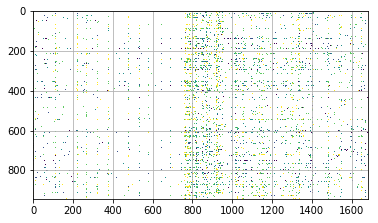

In [141]:
plt.imshow(y)
plt.grid(True)

# 기본적으로 sparse하다.

# x축은 item, y축은 user이다.

In [124]:
from surprise import BaselineOnly # 가장 기본적인 알고리즘 적용.
# Algorithm predicting the baseline estimate for given user and item.

In [143]:
train_data = surprise_data.build_full_trainset()
#데이터셋을 나누지 말고 모든 데이터를 trainset으로 반환

In [144]:
algo1 = surprise.BaselineOnly()
algo1.fit(train_data) # fitting

Estimating biases using als...


algo1은 이제 training 된 상황이다.

In [145]:
algo1.predict('1','1') #user, item 값을 각각 1을 줘서 predict했다.

Prediction(uid='1', iid='1', r_ui=None, est=3.8923532488948851, details={'was_impossible': False})

In [146]:
algo = surprise.KNNBasic() # 기본적인 collaborative filtering 알고리즘 객체

surprise포맷으로 불러 들인다.<br>
user,item, rating이 필요하다.<br>
fit시키기 위해서 build_full_trainset()으로 training set을 만들어준다.


In [147]:
algo.fit(train_data)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [148]:
algo.predict('1','1') # user, item에 각각 1값을 줘서 predict해준다.

Prediction(uid='1', iid='1', r_ui=None, est=4.1299713089494405, details={'actual_k': 40, 'was_impossible': False})

__SVD(Singular Value Decomposition)__   
  
특이값분해는 m x n 크기의 데이터 행렬 A를 아래와 같이 분해하는 걸 말합니다.

$$A=UΣVT$$
<img src="http://i.imgur.com/lP44bGq.png"/>

[SVD 관련 포스트 링크1](http://rfriend.tistory.com/185)  
[SVD 관련 포스트 링크2](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/)    

In [132]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

data = Dataset.load_builtin('ml-100k') # built-in dataset을 불러온다.
algo = SVD() # SVD 알고리즘

cross_validate(algo, data, cv=5)
# 5등분한 data에 대해 cross validation을 이용해서 실행 시간, 정확도를 출력해준다.

{'fit_time': (6.13857364654541,
  6.398183584213257,
  9.362856388092041,
  8.55200743675232,
  9.652127265930176),
 'test_mae': array([ 0.7451691 ,  0.74455542,  0.73519866,  0.73194463,  0.73952187]),
 'test_rmse': array([ 0.94400927,  0.94427613,  0.93198751,  0.92895999,  0.93597631]),
 'test_time': (0.16951537132263184,
  0.16060328483581543,
  0.29125428199768066,
  0.16951656341552734,
  0.5824418067932129)}

GridSearchCV는 cross-validation을 이용해서 parameter를 찾는것이다.
parameter에 따라서 performance가 좌지우지 되기 때문에 찾는다.

가장 성능이 좋은 파라미터를 찾는다.<br>
grid 방식. randomize 방식.

grid방식의 경우 training할 때 굉장히 많은시간 소요. <br>

randomize방식의 경우 확률적인 것에 기인해서 training. 그래서 시간이 좀 덜 걸린다. <br>


knn은 메모리 베이스